In [34]:
from hierarchicalcausalmodels.models.HSCMParametric.HSCMParametric import HSCM
import numpy as np



In [50]:
coeffs = {
    "a": {"mean": 0, "std": 1},
    "b": {"a": 1.5, "mean": 0, "std": 1},
    "c": {"a": 0.5, "b": 2.0, "mean": 0, "std": 1},
    "d": {"b": 1.0, "c": 1.0, "mean": 0, "std": 1},
    "e": {"d": 3.0, "b": 1, "mean": 0, "std": 1},
    "f": {"a": 0.8, "mean": 0, "std": 1},
    "g": {"c": 1.2, "mean": 0, "std": 1},
    "h": {"e": 2.5, "mean": 0, "std": 1},
    "i": {"f": 1.1, "g": 0.9, "mean": 0, "std": 1},
    "j": {"h": 1.3, "mean": 0, "std": 1}
}

nodes = {"a", "b", "c", "d", "e", "f", "g", "h", "i", "j"}
edges = {
    ("a", "b"), ("a", "c"), ("b", "c"), ("c", "d"), ("b", "d"), ("d", "e"), ("b", "e"),
    ("a", "f"), ("c", "g"), ("e", "h"), ("f", "i"), ("g", "i"), ("h", "j")
}
unit_nodes = {"a", "c", "e", "f", "h", "j"}
subunit_nodes = {"b", "d", "i","g"}
sizes = [100] * 10



{'e': {}, 'f': {}, 'c': {}, 'j': {}, 'h': {}, 'a': {}} aggregator_functions
{'e': {'_d': <function <lambda> at 0xfbc03881b6a0>}, 'f': {}, 'c': {}, 'j': {}, 'h': {}, 'a': {}} aggregator_functions
{'e': {'_d': <function <lambda> at 0xfbc03881b6a0>}, 'f': {}, 'c': {'_b': <function <lambda> at 0xfbc02f84c540>}, 'j': {}, 'h': {}, 'a': {}} aggregator_functions
You can't set an aggregator for this edge ('a', 'f')
{'e': {'_d': <function <lambda> at 0xfbc03881b6a0>}, 'f': {}, 'c': {'_b': <function <lambda> at 0xfbc02f84c540>}, 'j': {}, 'h': {}, 'a': {}} aggregator_functions
You can't set an aggregator for this edge ('e', 'h')
{'e': {'_d': <function <lambda> at 0xfbc03881b6a0>}, 'f': {}, 'c': {'_b': <function <lambda> at 0xfbc02f84c540>}, 'j': {}, 'h': {}, 'a': {}} aggregator_functions
You can't set an aggregator for this edge ('c', 'g')
{'e': {'_d': <function <lambda> at 0xfbc03881b6a0>}, 'f': {}, 'c': {'_b': <function <lambda> at 0xfbc02f84c540>}, 'j': {}, 'h': {}, 'a': {}} aggregator_function

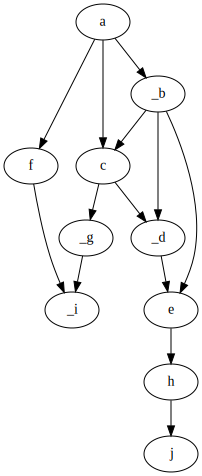

In [51]:

# Create an instance of the HSCM class
hscm = HSCM(nodes, edges, unit_nodes, subunit_nodes, sizes, node_functions={},data=[])
# hscm.print_predecessors()
hscm.linear_model(coeffs)
for edge in edges:
    hscm.set_aggregator(edge,lambda d:np.std(np.array(list(d))))
# Sample data
sampled_data = hscm.sample_data()


# Print the graph
hscm.cgm.draw()


In [52]:
def print_sampled_data(sampled_data):
    for key in sampled_data:
        print(key, sampled_data[key])

In [53]:
graph = hscm.collapse()

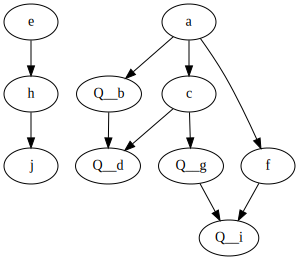

In [54]:
graph.draw()